<a href="https://colab.research.google.com/github/BettySanchez7/AirDataMx/blob/main/Notebooks/MODULO%205/Perceptr%C3%B3n_multicapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.layers import Dense
import math

CARGAMOS LOS DATOS

In [227]:
url = "https://raw.githubusercontent.com/BettySanchez7/AirDataMx/main/datos/promedios_mensuales/CO_mensual.csv"
df = pd.read_csv(url,usecols=[0,4])
df

,fecha,sureste_monoxido_de_carbono
0,2005-01-31,22.038978
1,2005-02-28,19.949405
2,2005-03-31,17.314516
3,2005-04-30,18.925000
4,2005-05-31,20.306452
...,...,...
187,2020-08-31,4.165775
188,2020-09-30,4.617134
189,2020-10-31,4.910398
190,2020-11-30,5.517874


In [228]:
df=df.groupby(df['fecha']).mean()

In [229]:
df

,sureste_monoxido_de_carbono
fecha,
2005-01-31,22.038978
2005-02-28,19.949405
2005-03-31,17.314516
2005-04-30,18.925000
2005-05-31,20.306452
...,...
2020-08-31,4.165775
2020-09-30,4.617134
2020-10-31,4.910398


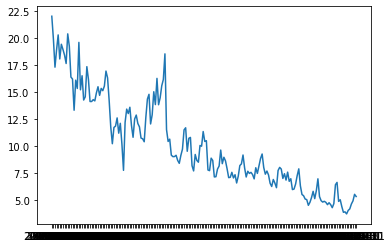

In [230]:
plt.plot(df)
plt.show()

In [231]:
df = df.values
df = df.astype('float32')

In [232]:
train_size = int(len(df)*.7)
test_size = len(df) - train_size
train, test = df[0:train_size,:],df[train_size:len(df),:]
print(len(train),len(test))

134 58


In [233]:
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [250]:
look_back = 30
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
model = Sequential()
model.add(Dense(108, input_dim=look_back, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10000, batch_size=2, verbose=2)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Epoch 2226/10000
52/52 - 0s - loss: 0.0604
Epoch 2227/10000
52/52 - 0s - loss: 0.0290
Epoch 2228/10000
52/52 - 0s - loss: 0.0184
Epoch 2229/10000
52/52 - 0s - loss: 0.0212
Epoch 2230/10000
52/52 - 0s - loss: 0.0134
Epoch 2231/10000
52/52 - 0s - loss: 0.0293
Epoch 2232/10000
52/52 - 0s - loss: 0.0235
Epoch 2233/10000
52/52 - 0s - loss: 0.0494
Epoch 2234/10000
52/52 - 0s - loss: 0.0496
Epoch 2235/10000
52/52 - 0s - loss: 0.0512
Epoch 2236/10000
52/52 - 0s - loss: 0.0400
Epoch 2237/10000
52/52 - 0s - loss: 0.0799
Epoch 2238/10000
52/52 - 0s - loss: 0.0835
Epoch 2239/10000
52/52 - 0s - loss: 0.0774
Epoch 2240/10000
52/52 - 0s - loss: 0.0942
Epoch 2241/10000
52/52 - 0s - loss: 0.0805
Epoch 2242/10000
52/52 - 0s - loss: 0.1652
Epoch 2243/10000
52/52 - 0s - loss: 0.0735
Epoch 2244/10000
52/52 - 0s - loss: 0.0802
Epoch 2245/10000
52/52 - 0s - loss: 0.0297
Epoch 2246/10000
52/52 - 0s - loss: 0.0207
Epoch 2247/10000
52/52 - 0s - 

In [254]:
# Estimacion del rendimiento del modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Resultado del entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Resultado del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Resultado del entrenamiento: 4.82 MSE (2.20 RMSE)
Resultado del test: 11.99 MSE (3.46 RMSE)


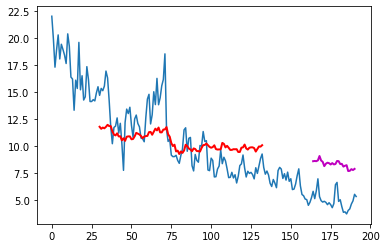

In [255]:
# predicciones del entrenamiento generadas
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones de la prueba de desplazamiento para plotear
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df)-1, :] = testPredict
# ploteamos la línea de base y las predicciones
plt.plot(df)
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.show()

In [256]:
# Estimacion del rendimiento del modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Resultado del entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Resultado del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Resultado del entrenamiento: 4.82 MSE (2.20 RMSE)
Resultado del test: 11.99 MSE (3.46 RMSE)


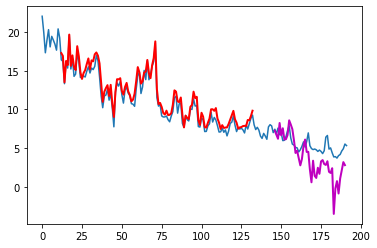

In [245]:
# predicciones del entrenamiento generadas
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones de la prueba de desplazamiento para plotear
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df)-1, :] = testPredict
# ploteamos la línea de base y las predicciones
plt.plot(df)
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.show()